# Low-Rank Approximation

In this section, you will be asked to investigated how the trade-off between
the selected ranks of SVD and its performance in terms of reconstruction
accuracy and speed-up (in clock-time and in FLOPS).

## 1. Set-up

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

A tensor([[  2,   4],
        [  8, -16]]) tensor([[ -2,   8, -16],
        [  4,   2,  -8]])
tensor([[ 12.,  24., -64.],
        [-80.,  32.,   0.]])
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Make sure your token is stored in a txt file at the location below.
# This way there is no risk that you will push it to your repo
# Never share your token with anyone, it is basically your github password!
with open('/content/gdrive/MyDrive/ece5545/token.txt') as f:
    token = f.readline().strip()
# Use another file to store your github username
with open('/content/gdrive/MyDrive/ece5545/user.txt') as f:
    handle = f.readline().strip()

In [ ]:
# Clone your github repo
YOUR_TOKEN = token
YOUR_HANDLE = handle
BRANCH = "main"

%mkdir /content/gdrive/MyDrive/ece5545
%cd /content/gdrive/MyDrive/ece5545
!git clone https://{YOUR_TOKEN}@github.com/ML-HW-SYS/a4-{YOUR_HANDLE}.git
%cd /content/gdrive/MyDrive/ece5545/a4-{YOUR_HANDLE}
!git checkout {BRANCH}
!git pull
%cd /content/gdrive/MyDrive/ece5545

PROJECT_ROOT = f"/content/gdrive/MyDrive/ece5545/a4-{YOUR_HANDLE}"

mkdir: cannot create directory ‘/content/gdrive/MyDrive/ece5545’: File exists
/content/gdrive/MyDrive/ece5545
fatal: destination path 'a4-ethanglaser' already exists and is not an empty directory.
/content/gdrive/MyDrive/ece5545/a4-ethanglaser
M	1-numerical_precision.ipynb
M	2-svd_rank.ipynb
M	src/conv2d.py
M	src/matmul.py
M	tests/test_conv2d.py
M	tests/test_matmul.py
Already on 'main'
Your branch is up to date with 'origin/main'.
Already up to date.
/content/gdrive/MyDrive/ece5545


In [ ]:
# This extension reloads all imports before running each cell
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Verify the following cell prints your github repository.

In [ ]:
!ls {PROJECT_ROOT}


1-numerical_precision.ipynb  data      README.md  tests
2-svd_rank.ipynb	     mnist.py  src


In [ ]:
# Install required packgaes
!pip install torch numpy matplotlib

# 2. Rank v.s. Reconstruction Error

In this following cell(s), please plot the number of ranks preserved for A matrix (in the x-axis)
and the reconstruction error of the matrix (in the y-axis, measured by the Frobenius Norm).

NOTE: you can use `svd(A, torch.eye(A.shape(2), rank_A=<rank>, rank_B=None)` to do SVD, drop the rank
to `<rank>`, and return the reconstruction matrix of `A`.

We will provide a series of matrix for you to study. Please make one plot per matrix.
For each plot, comment on the trade-off between the number of ranks selected and the error by answering
the following questions:
1. Is the reconstruction error increasing or decreasing as we add more rank?
2. How fast is the reconstruction error change as we add more rank? Is it changing quickly or slowly? Why?
3. Is there a rank number below/above which the reconstruction error increase significantly?
4. What can you learn about this data?

[Errno 2] No such file or directory: 'a4-ethanglaser/'
/content/gdrive/MyDrive/ece5545/a4-ethanglaser


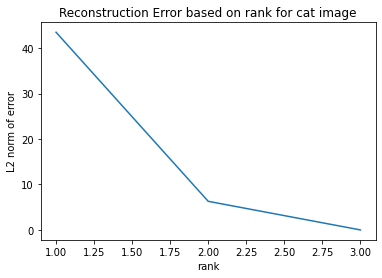

In [ ]:
%cd a4-ethanglaser/
from src.matmul import svd
import torch
import numpy as np
import matplotlib.image
import matplotlib.pyplot as plt
# Pixels of a cute cat
A = torch.from_numpy(matplotlib.image.imread("data/cat.png")).view(-1, 3)

ranks = list(range(1, 4))
errors = []
for rank in ranks:
    reconstructed_A = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)
    errors.append(np.linalg.norm(A - reconstructed_A))

plt.plot(ranks, errors)
plt.title("Reconstruction Error based on rank for cat image")
plt.xlabel("rank")
plt.ylabel("L2 norm of error")
plt.show()

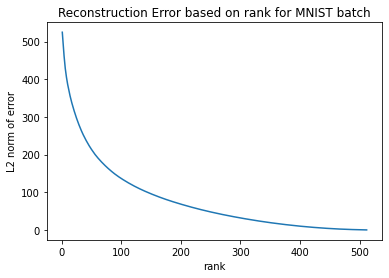

In [ ]:
# A batch of MNIST digit
import torch
A = torch.load("data/mnist_act.pt")['act.0']
ranks = list(range(1, 513))
errors = []
for rank in ranks:
    reconstructed_A = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)
    errors.append(np.linalg.norm(A - reconstructed_A))

plt.plot(ranks, errors)
plt.title("Reconstruction Error based on rank for MNIST batch")
plt.xlabel("rank")
plt.ylabel("L2 norm of error")
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


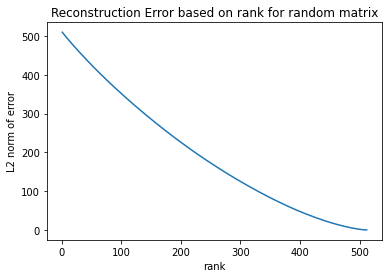

In [ ]:
import torch
# A random matrix
A = torch.randn(512, 512)

ranks = list(range(1, 513))
errors = []
for rank in ranks:
    reconstructed_A = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)
    errors.append(np.linalg.norm(A - reconstructed_A))

plt.plot(ranks, errors)
plt.title("Reconstruction Error based on rank for random matrix")
plt.xlabel("rank")
plt.ylabel("L2 norm of error")
plt.show()

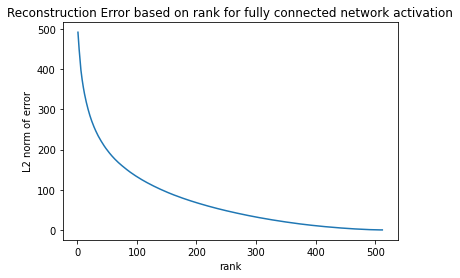

In [ ]:
import torch
# Intermediate activation of a Fully connected network (trained on MNIST)
A = torch.load("data/mnist_act.pt")['act.1']

ranks = list(range(1, 513))
errors = []
for rank in ranks:
    reconstructed_A = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)
    errors.append(np.linalg.norm(A - reconstructed_A))

plt.plot(ranks, errors)
plt.title("Reconstruction Error based on rank for fully connected network activation")
plt.xlabel("rank")
plt.ylabel("L2 norm of error")
plt.show()

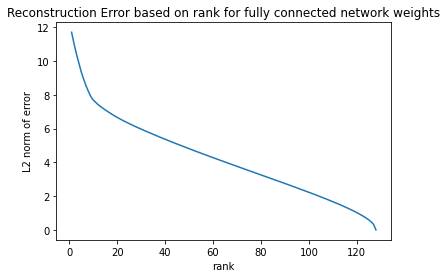

In [ ]:
import torch
# Weight matrix of a fully connected neural network (trained on MNIST)
A = torch.load("data/mnist_fc.pt")['fc2.weight']

ranks = list(range(1, 129))
errors = []
for rank in ranks:
    reconstructed_A = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)
    errors.append(np.linalg.norm(A - reconstructed_A))

plt.plot(ranks, errors)
plt.title("Reconstruction Error based on rank for fully connected network weights")
plt.xlabel("rank")
plt.ylabel("L2 norm of error")
plt.show()

# 2. Rank v.s. Speed up

In this following cell(s), please plot the number of ranks preserved for A matrix (in the x-axis)
and the speed up of matrix-matrix multiply (in the y-axis, measured by both FLOPs and clock time)

You can assume both matrix A and B are using the same number of rank when approximating.

A tensor([[  2,   4],
        [  8, -16]]) tensor([[ -2,   8, -16],
        [  4,   2,  -8]])
tensor([[ 12.,  24., -64.],
        [-80.,  32.,   0.]])


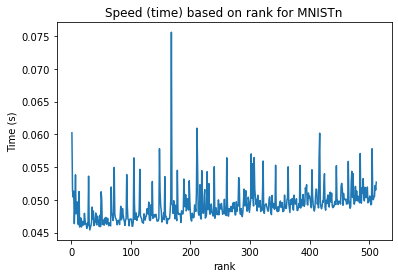

torch.Size([512, 128])


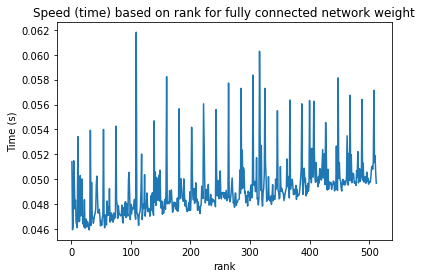

In [ ]:
import torch
import time
# Intermediate activation of a Fully connected network (trained on MNIST)
A = torch.load("data/mnist_act.pt")['act.1']

ranks = list(range(1, 513))
times = []
for rank in ranks:
    start = time.time()
    reconstructed_A = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)
    end = time.time()
    times.append(end - start)
plt.figure()
plt.plot(ranks, times)
plt.title("Speed (time) based on rank for MNISTn")
plt.xlabel("rank")
plt.ylabel("Time (s)")
plt.show()

# Weight matrix of a fully connected neural network (trained on MNIST)
B = torch.load("data/mnist_fc.pt")['fc2.weight'].transpose(0, 1)
print(B.shape)

ranks = list(range(1, 513))
times = []
for rank in ranks:
    start = time.time()
    reconstructed_A = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)
    end = time.time()
    times.append(end - start)
plt.figure()
plt.plot(ranks, times)
plt.title("Speed (time) based on rank for fully connected network weight")
plt.xlabel("rank")
plt.ylabel("Time (s)")
plt.show()
